<a href="https://colab.research.google.com/github/liady/dl-ydata/blob/master/SVM_Kernels_Liad_Yosef_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excerise 4
In this exercise you will get some hands on experience with applying SVM for classification problems using non-linear kernels.


## An upper bound for the generalization error using the number of support vectors

([C. Cortes and V. Vapnik. Support vector networks. Machine Learning, 20:273–297, 1995](http://image.diku.dk/imagecanon/material/cortes_vapnik95.pdf)) mentions a theoretical bound on the actual risk of support vector machines,  in the case where the vectors are separated without errors by some optimal hyperplane. The bound is given by

$$
\mathbb{E}[\epsilon_{\text{generalization}}]\le\frac{\mathbb{E}[\text{# Support Vectors}]}{N}
$$

where $N$ is the sample set size, $\mathbb{E}[\epsilon_{\text{generalization}}]$ is the expectated generalization error for SVM learned on $N-1$ samples, and $\mathbb{E}[\text{# Support Vectors}]$ is the expectation of the number of support vectors over all choices of training sets of size $N$.

**Prove this bound**. (No need for a detailed mathmatical formulation of the proof.) 

**Hint**: think about "leave-one-out" error estimation. 

### Answer
$N*\mathbb{E}[\epsilon_{\text{generalization}}]$ is actually the sum of all generalization errors over groups of N-1 samples from the training data. Since the number of support vectors is directly linked to generalization (less support vectors - less complex model - more general) - the probability of an error decreases with a decrease in the support vectors number.

## SVM with a polynomial kernel

You are given data $x=(x_1,x_2)\in\mathbb{R}^2$ that is known to be labeled using the function
$$
y = \text{sign}(3x_1^2 - x_2 - 2)
$$


### Question 1
Use the polynomial transformation into a higher dimensional space, with a polynomial degree 2, and write down a separating hyperplane **in that higher dimension** such that all the samples will be classified correctly. That is, find $w$ and $b$ such that
$$
\forall(x,y):\,\,\,\text{sign}(w^T\phi(x)+b)=y
$$
where 
$$
\phi(x)=\phi(x_1,x_2)=(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2)
$$


### Answer 1
$
w = (-2, 3, 0, 0, \dfrac{-1}{\sqrt{2}}, 0)\\
b=0 
$

### Question 2
Using the result above, we know there is a linear separating hyperplane in the 2-degree polynomial higher dimension space. That means we should be able to use SVM with a polynomial kernel of degree 2 to perfectly separate the classes.
​
- Apply such SVM on the 4 points sample set provided below (use `sklearn.SVC` and **make sure to set `coef0=1`**)
- Draw the resulting separarting hyperplane and show the support vectors in the original 2D space (check out the `support_` attribute).
- Compare the results with the true function that generates that data.
- Create a new training data set with 100 samples (use the provided function) and repeat the steps above. Did your results change? What about 500 samples?
- How does the number of support vectors relative to the sample set size changes as you increase the sample set size? What does it mean?
- Compare the running time and memory usage of the polynomial kernel SVM, and a linear SVM with a polynomial transform of the features as a preprocessing step.
  - Use `%timeit` and `%memit` IPython magic commands (see [Profiling and Timing Code](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.07-Timing-and-Profiling.ipynb#scrollTo=qwj3raDxg7Ke)). Note you may need to run one or both of the following:
    - `!pip install memory_profiler`
    - `%load_ext memory_profiler`
​
  -  For the linear SVM with polynomail transform use `sklearn.preprocessing.PolynomialFeatures` and `sklearn.pipeline.make_pipeline`
- Write your conclusions.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary(x1, x2):
  return 3*x1**2 - x2 - 2

def generate_data(m, seed=None):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed)
  X1 = np.random.uniform(low=-2.0, high=2.0, size=(m,1))
  X2 = np.random.uniform(low=-3.0, high=9.0, size=(m,1))
  X = np.hstack((X1, X2))
  y = np.sign(true_boundary(X[:,0], X[:,1]))
  y[y==0] = 1  
  return X, y

def plot_labeled_data(X, y, plot_func=True):
  plt.scatter(X[(y==1),0], X[(y==1),1], c='r')
  plt.scatter(X[(y==-1),0], X[(y==-1),1], c='b')  
  plt.xlim([-2, 2]);
  plt.ylim([-3, 9]);
  if plot_func == True:
    plt.plot(np.linspace(-2,2,100), true_boundary(np.linspace(-2,2,100), np.zeros(100)), linewidth=2, c='k');


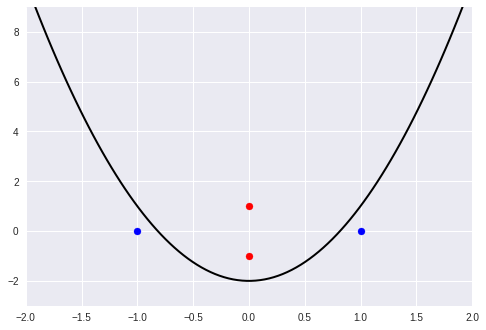

In [2]:
# the sample set
X_sample = np.array([[-1,  0],
              [ 1,  0],
              [ 0, -1],
              [ 0,  1]])

y_sample = np.array([-1,
              -1,
               1,
               1])

plot_labeled_data(X_sample, y_sample)

### Answer 2


In [0]:
from sklearn.svm import SVC

def plotSVM(SVM, X, y, box, plt=plt):
  x_min, x_max = box[0], box[1]
  y_min, y_max = box[2], box[3]
  XX, YY = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
  Z = SVM.decision_function(np.c_[XX.ravel(), YY.ravel()])
  Z = Z.reshape(XX.shape)
  # plot the decision function
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
    linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])
  # mark the support vectors
  plt.scatter(X[SVM.support_, 0], X[SVM.support_, 1], s=100,
              facecolors='none', zorder=10, edgecolor='k')

def plot_hyperplane(X, y, plot_func=True):
  polySVM = SVC(coef0 = 1, kernel = 'poly', gamma = 1, degree = 2)
  polySVM.fit(X, y)
  plot_labeled_data(X, y, plot_func)
  print(polySVM.score(X, y))
  plotSVM(polySVM, X, y, [-2, 2, -3, 9])
 

1.0


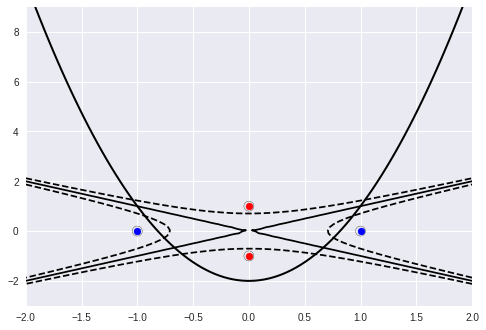

In [4]:
plot_hyperplane(X_sample, y_sample)

0.98


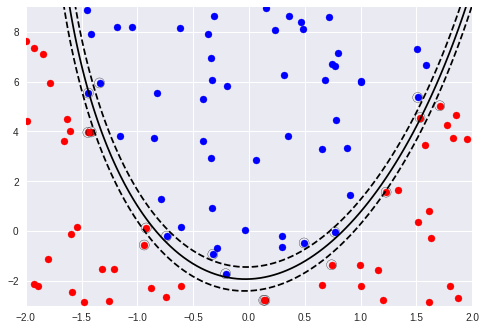

In [5]:
X, y = generate_data(100, seed = 1)
plot_hyperplane(X, y, plot_func=False)

0.99


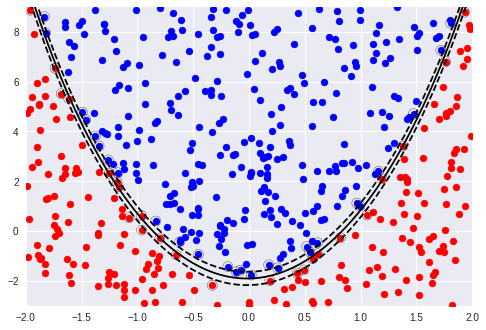

In [6]:
X, y = generate_data(500, seed = 2)
plot_hyperplane(X, y, plot_func=False)

As the number of samples increases, the result of the SVM is closer to the actual function. However - the number of support vectors (the vectors that it relies on as significant) also increases.
It means that the model is more complex (uses more $a$s) and holds more "knowledge" about the data in it.

Interesting to note that gamma="auto" and gamma="scale" did not yield good results. gamma=10 however - did.

## RBF Kernel
Show that the Radial Basis Function kernel is equivalent to a dot product in an infinite number of dimensions. The RBF kernel is defined as


$$
K(\mathbf {x},\mathbf {x'}) = \exp \left(-\frac {\|\mathbf {x} -\mathbf {x'} \|^2}{2\sigma^2}\right)
$$




$
\exp \left(-\frac {\|\mathbf {x} -\mathbf {x'} \|^2}{2\sigma^2}\right) = \\
exp(\frac{1}{2\sigma^2})*exp(-x^2)*exp(-x'^2)*exp(2xx') \\
$

Note that:

$
exp(2xx') = \sum_{n=1}^{\infty}{\dfrac{2^nx^nx'^n}{n!}} =<\phi(x), \phi(x')>
$

where:

$
\phi(x)_i = \sqrt{\dfrac{2^i}{i!}}(x)^i
$

So:

$
\exp \left(-\frac {\|\mathbf {x} -\mathbf {x'} \|^2}{2\sigma^2}\right) = \underbrace{exp(\frac{-(x^2+x'^2)}{2\sigma^2})}_\text{constant} * <\phi(x), \phi(x')>
$

## Classifying Checkerboard with SVM
In this exercise you will try to choose a kernel for classifying a checkerboard labeled data. 

* Use the `checkboard` function below to generate
your training set (1000 or 2000 samples) and a testing set (as much as you like). As you can see the function generates samples in 2D and label them according to a 3 × 3 checkerboard (obviously linear separation will not do the job here). Python’s scatter in the might come in handy.

* Use SVM to find a good linear separation in high dimensional feature space using the polynomial or the Gaussian (RBF) kernel.    You should evaluate for both models the best parameters to use. Explain how do you evalute each model?
   - For polynomial kernel, estimate which degree to use
   - For RBF, estimate which standard deviation to use
   - For both models, also choose which regularization parameter is best to use
 
* For the best model of each kernel, plot a scatter plot of the training patterns (colored by label) and mark the support vectors as well. Which model would you choose to use in this case?

* In addition, if you are curious, you can try and think of a way to plot the separating hyper-surface (curve in this case), the margin, and the testing set (to check which points are misclassified).



In [0]:
import numpy as np
def checkerboard(n):
  """
  CHECKERBOARD Sample points from a 3x3 checkerboard in 2D
  """
  X = np.random.rand(n,2); # samples dimension N = 2
  l = np.mod(np.ceil(X*3), 2);
  y0 = np.logical_xor(l[:,0], l[:,1])
  y = y0*2-1 # {-1,+1}
  return X, y


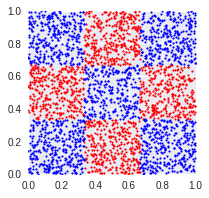

In [8]:
# Usage sample
import matplotlib.pyplot as plt
X, y = checkerboard(3000)

def plot_checkboard(plt, X, y):
  plt.scatter(X[y==1,0], X[y==1,1], c='r', s=3)
  plt.scatter(X[y==-1,0], X[y==-1,1], c='b', s=3)
  plt.set_xlim([0,1])
  plt.set_ylim([0,1])

plt.figure(figsize=(3,3))
main=plt.subplot()
plot_checkboard(main, X, y)

In [9]:
def runPolySVM(X, y, degree = 2, gamma = 10):
  polySVM = SVC(coef0 = 1, kernel = 'poly', gamma=gamma, degree=degree)
  polySVM.fit(X, y)
  print('Degree:', degree, 'Gamma:', gamma, 'Score:', polySVM.score(X, y))
  return polySVM

max_score_poly = 0
best_degree_svm = None
for degree in [4, 5, 6, 7, 8, 9, 10]:
  SVM = runPolySVM(X, y, degree)
  if(SVM.score(X, y) > max_score_poly):
    max_score_poly = SVM.score(X, y)
    best_degree_svm = SVM
  

Degree: 2 Gamma: 10 Score: 0.6486666666666666
Degree: 3 Gamma: 10 Score: 0.6483333333333333
Degree: 4 Gamma: 10 Score: 0.859
Degree: 5 Gamma: 10 Score: 0.954
Degree: 6 Gamma: 10 Score: 0.984
Degree: 7 Gamma: 10 Score: 0.994
Degree: 9 Gamma: 10 Score: 0.992
Degree: 10 Gamma: 10 Score: 0.9933333333333333


In [15]:
def runRBF_SVM(X, y, gamma = 'auto'):
  RBF_SVM = SVC(kernel = 'rbf', gamma=gamma)
  RBF_SVM.fit(X, y)
  print('STD:', gamma, 'Score:', RBF_SVM.score(X, y))
  return RBF_SVM

max_score_rbf = 0
best_gamma_SVM = None
for gamma in [0.1, 1, 10, 100, "auto", "scale"]:
  SVM = runRBF_SVM(X, y, gamma)
  if(SVM.score(X, y) > max_score_rbf):
    max_score_rbf = SVM.score(X, y)
    best_gamma_SVM = SVM

STD: 0.1 Score: 0.5523333333333333
STD: 1 Score: 0.6633333333333333
STD: 10 Score: 0.9753333333333334
STD: 100 Score: 0.9876666666666667
STD: auto Score: 0.6503333333333333
STD: scale Score: 0.7636666666666667


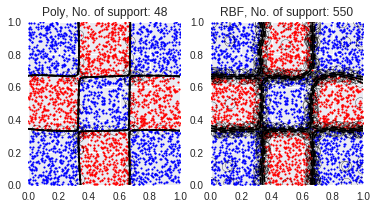

In [20]:
plt.figure(figsize=(6, 3))

poly=plt.subplot(1, 2, 1)
plot_checkboard(poly, X, y)
plotSVM(best_degree_svm, X, y, [0,1,0,1], plt=poly)
poly.set_title("Poly, No. of support: %s" % best_degree_svm.support_.shape[0])

rbf=plt.subplot(1, 2, 2)
plot_checkboard(rbf, X, y)
plotSVM(best_gamma_SVM, X, y, [0,1,0,1], plt=rbf)
rbf.set_title("RBF, No. of support: %s" % best_gamma_SVM.support_.shape[0])

pass



## References
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/